# 1 Dependency import

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [138]:
def dataframe_distribution_overview(data, figsize=(10, 3)):
    plt.figure(figsize=figsize)

    sns.barplot(x=data.columns, y=data.count())

    plt.title("Number of values per column", size=20)
    plt.xticks(rotation=45, size=16, ha="right")
    plt.yticks(size=16)
    plt.ylabel("Number values", size=16)
    plt.show()

In [139]:
def index_lth(data, percentage: int):
    percentage = percentage / 100
    less_than = data.count() < data.shape[0] * percentage
    index_less_than = less_than[less_than == True].index
    return index_less_than

In [140]:
def multi_boxplot(data, features):
    n_cols = 8
    n_rows = ceil(data.loc[:, features].shape[1] / n_cols)
    index = 1

    plt.subplots(n_rows, n_cols, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.35, hspace=0.35)

    for r in range(n_rows):
        for c in range(n_cols):
            plt.subplot(n_rows, n_cols, index)
            feature = data.loc[:, features].iloc[:, index-1].name
            boxplot = sns.boxplot(y=data[feature])
            boxplot.set_xlabel(feature, fontsize=12)
            boxplot.set_ylabel(None)
            
            index += 1

            if index > data.shape[1]:
                break
    plt.show()

In [152]:
def create_subplot(dataset, feature, n_rows, index, is_numeric):
    plt.subplot(n_rows, 2, index)
    uniques = dataset[feature].unique()

    if is_numeric:
        plot = sns.boxplot(y=dataset[feature])
    else:
        if uniques.size <= 20 and uniques.size > 0:
            plot = sns.countplot(x=dataset[feature])
            plt.xticks(rotation=45, size=8, ha="right")
        else:
            dist = pd.DataFrame(data=[[uniques.size, dataset.shape[0] - uniques.size]], columns=["uniques", "not_uniques"])
            plot = sns.barplot(data=dist)

    plot.set_xlabel(None)
    plot.set_ylabel(feature, fontsize=14)


def dataset_diff_analysis(data1, data2, exclude=[], figsize=(15, 200)):
    features = data1.columns.union(data2.columns).difference(exclude)
    n_cols = 2
    n_rows = len(features)
    col_id = 0
    index = 1

    plt.subplots(n_rows, n_cols, figsize=figsize)
    plt.subplots_adjust(wspace=0.35, hspace=0.5)

    for f in features:
        is_numeric = False
        if f in data1.columns:
            f_type = data1[f].dtype
        else:
            f_type = data2[f].dtype
        if f_type in ["int64", "float64"]:
            is_numeric = True

        if f in data1.columns.values:
            create_subplot(data1, f, n_rows, index, is_numeric)
        if f in data2.columns.values:
            create_subplot(data2, f, n_rows, index+1, is_numeric)

        index += 2

    print(f"features: {features}")
    plt.show()

In [142]:
def decribe_several(feature, *df):
    data = {}
    index = 1
    for d in df:
        data[feature + "_" + str(index)] = d[feature]
        index += 1
    final_dataframe = pd.DataFrame(data)
    return final_dataframe.describe()

In [143]:
def head_several(feature, nb, *df):
    data = {}
    index = 1
    for d in df:
        data[feature + "_" + str(index)] = d[feature]
        index += 1
    final_dataframe = pd.DataFrame(data)
    return final_dataframe.head(nb)

In [144]:
class OutlierProcessor():
    def __init__(self, data, feature, lower_trig, upper_trig):
        self.data = data
        self.feature = feature
        self.lower_trig = lower_trig
        self.upper_trig = upper_trig
        self.__above = 0
        self.__below = 0
        self.__total = 0

    def __print(self):
        print(f"lower_trig: {self.lower_trig}")
        print(f"upper_trig: {self.upper_trig}")
        print(f"below: {self.__below}")
        print(f"above: {self.__above}")
        print(f"total: {self.__total}")

    def count(self):
        self.__below = self.data[self.data[self.feature] < self.lower_trig][self.feature].count()
        self.__above = self.data[self.data[self.feature] > self.upper_trig][self.feature].count()
        self.__total = self.__below + self.__above
        self.__print()

    def replace(self, replace_by=np.nan, inplace=False):
        return self.data[self.feature].where(cond=lambda x: ((x > self.lower_trig) & (self.upper_trig > x)), other=replace_by, inplace=inplace)


In [145]:
class OutlierIqrProcessor(OutlierProcessor):
    def __init__(self, data, feature):
        self.__q1 = data[feature].quantile(0.25)
        self.__q3 = data[feature].quantile(0.75)
        self.__iqr = self.__q3 - self.__q1
        upper_trig = self.__q3 + (1.5 * self.__iqr)
        lower_trig = self.__q1 - (1.5 * self.__iqr)
        super().__init__(data, feature, lower_trig, upper_trig)


***
# 2 Data loading

## 2.1 Loading

In [146]:
data = pd.read_csv("data/2015-building-energy-benchmarking.csv", delimiter=",")

In [147]:
data2 = pd.read_csv("data/2016-building-energy-benchmarking.csv", delimiter=",")

***
## 2.2 Merging

In [148]:
# inter_cols = data.columns.intersection(data2.columns)
# print(f"nb: {len(inter_cols)}")
# inter_cols

In [149]:
# data[data.columns.difference(inter_cols)].columns

In [150]:
# data2[data2.columns.difference(inter_cols)].columns

features: Index(['2010 Census Tracts', 'Address', 'BuildingType', 'City',
       'City Council Districts', 'ComplianceStatus', 'CouncilDistrictCode',
       'DataYear', 'DefaultData', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'Latitude',
       'ListOfAllPropertyUseTypes', 'Location', 'Longitude',
       'NaturalGas(kBtu)', 'NaturalGas(therms)', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID',
       'OtherFuelUse(kBtu)', 'Outlier', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'PropertyName', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(k

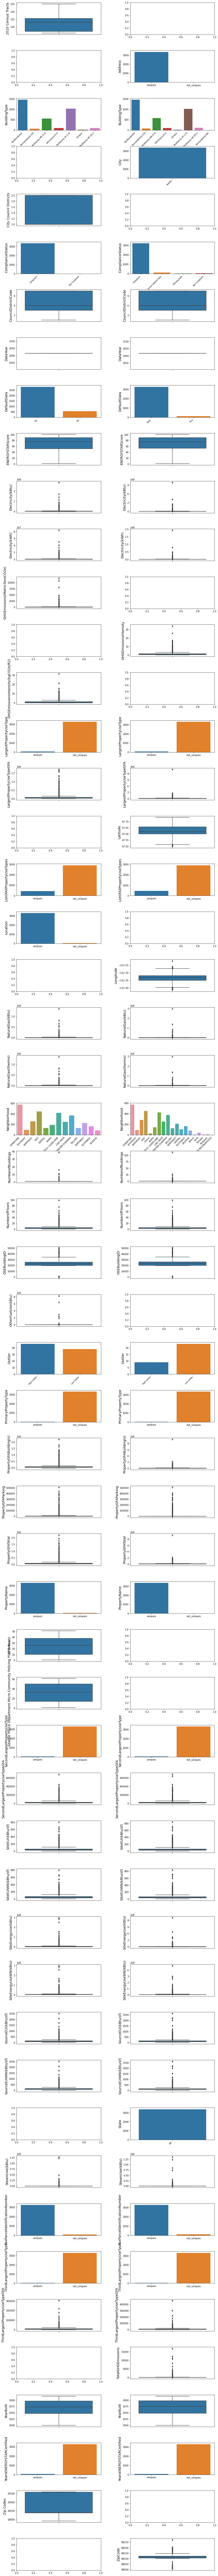

In [151]:
dataset_diff_analysis(data, data2, exclude=["Comment", "Comments"], figsize=(15, 200))

***
### 2.2.1 '2010 Census Tracts'

In [20]:
feature = "2010 Census Tracts"

In [21]:
data[data[feature].notna()].loc[:, feature].head()

60    124.0
91    116.0
92    123.0
93    123.0
94    123.0
Name: 2010 Census Tracts, dtype: float64

In [22]:
data[feature].describe()

count    224.000000
mean     123.062500
std        5.812128
min      116.000000
25%      117.000000
50%      123.000000
75%      125.500000
max      135.000000
Name: 2010 Census Tracts, dtype: float64

In [23]:
data.drop(columns=[feature], inplace=True)

***
### 2.2.2 Address

In [24]:
feature = "Address"

In [26]:
data2[feature].describe()

count                  3376
unique                 3354
top       2600 SW Barton St
freq                      4
Name: Address, dtype: object

In [27]:
data[feature] = pd.Series(data=0, name=feature, dtype="object")

***
### 2.2.3 BuildingType

In [54]:
feature = "BuildingType"

In [55]:
data[feature].describe()

count               3340
unique                 7
top       NonResidential
freq                1461
Name: BuildingType, dtype: object

***
### 2.2.4 City

In [28]:
feature = "City"

In [29]:
data2[feature].describe()

count        3376
unique          1
top       Seattle
freq         3376
Name: City, dtype: object

In [30]:
data2.drop(columns=[feature], inplace=True)

***
### 2.2.5 'City Council Districts'

In [56]:
feature = "City Council Districts"

In [57]:
data[feature].describe()

count    213.000000
mean       1.347418
std        0.477272
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: City Council Districts, dtype: float64

In [60]:
data.drop(columns=[feature], inplace=True)

***
### 2.2.6 ComplicanceStatus

In [84]:
feature = "ComplianceStatus"

In [85]:
decribe_several(feature, data, data2)

,ComplianceStatus_1,ComplianceStatus_2
count,3340,3376
unique,2,4
top,Compliant,Compliant
freq,3337,3211


***
### 2.2.7 CouncilDistrictCode

In [96]:
feature = "CouncilDistrictCode"

In [97]:
decribe_several(feature, data, data2)

,CouncilDistrictCode_1,CouncilDistrictCode_2
count,3340.000000,3376.000000
mean,4.450898,4.439277
std,2.127203,2.120625
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,7.000000,7.000000


***
### 2.2.8 DataYear

In [87]:
feature = "DataYear"

In [95]:
decribe_several(feature, data, data2)

,DataYear_1,DataYear_2
count,3340.0,3376.0
mean,2015.0,2016.0
std,0.0,0.0
min,2015.0,2016.0
25%,2015.0,2016.0
50%,2015.0,2016.0
75%,2015.0,2016.0
max,2015.0,2016.0


***
### 2.2.9 DefaultData

In [102]:
feature = "DefaultData"

In [104]:
decribe_several(feature, data, data2)

,DefaultData_1,DefaultData_2
count,3339,3376
unique,2,2
top,No,False
freq,2791,3263


In [113]:
head_several(feature, 10, data, data2)

,DefaultData_1,DefaultData_2
0,No,False
1,No,False
2,Yes,False
3,No,False
4,No,False
5,No,False
6,No,False
7,No,False
8,No,False
9,No,False


***
### 2.2.10 ENERGYSTARScore

In [114]:
feature = "ENERGYSTARScore"

In [116]:
decribe_several(feature, data, data2)

,ENERGYSTARScore_1,ENERGYSTARScore_2
count,2560.000000,2533.000000
mean,67.894141,67.918674
std,27.154057,26.873271
min,1.000000,1.000000
25%,51.750000,53.000000
50%,76.000000,75.000000
75%,90.000000,90.000000
max,100.000000,100.000000


***
### 2.2.11 Electricity(kBtu)

In [117]:
feature = "Electricity(kBtu)"

In [118]:
decribe_several(feature, data, data2)

,Electricity(kBtu)_1,Electricity(kBtu)_2
count,3.330000e+03,3.367000e+03
mean,3.473209e+06,3.707612e+06
std,9.519639e+06,1.485066e+07
min,0.000000e+00,-1.154170e+05
25%,6.363322e+05,6.394870e+05
50%,1.160236e+06,1.177583e+06
75%,2.750847e+06,2.829632e+06
max,2.847263e+08,6.570744e+08


***
### 2.2.12 Electricity(kWh)

In [119]:
feature = "Electricity(kWh)"

In [120]:
decribe_several(feature, data, data2)

,Electricity(kWh)_1,Electricity(kWh)_2
count,3.330000e+03,3.367000e+03
mean,1.017897e+06,1.086639e+06
std,2.789931e+06,4.352478e+06
min,0.000000e+00,-3.382680e+04
25%,1.864908e+05,1.874229e+05
50%,3.400320e+05,3.451299e+05
75%,8.061935e+05,8.293178e+05
max,8.344505e+07,1.925775e+08


***
### 2.2.13 GHGEmissions(MetricTonsCO2e)

In [121]:
feature = "GHGEmissions(MetricTonsCO2e)"

In [124]:
data[feature].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

***
### 2.2.14 GHGEmissionsIntensity

In [125]:
feature = "GHGEmissionsIntensity"

In [126]:
data2[feature].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [127]:
data[feature] =  pd.Series(data=0, name=feature, dtype="object")

***
### 2.2.15 GHGEmissionsIntensity(KgCO2e/ft2)

In [132]:
feature = "GHGEmissionsIntensity(kgCO2e/ft2)"

In [133]:
data[feature].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

***
## 2.3 Correction

### 2.3.1 ZipCode

In [ ]:
data["Zip Codes"].describe()

In [ ]:
data2["ZipCode"].describe()

In [ ]:
data.rename(columns={
    "Zip Codes": "ZipCode"
}, inplace=True)

***
### 2.3.2

In [ ]:
data[data["Comment"].notna()].Comment.head()

In [ ]:
data2[data2["Comments"].notna()].Comments.head()

In [ ]:
data2["Comments"].describe()

In [ ]:
data.rename(columns={
    "Comment": "Comments"
}, inplace=True)

***
### 2.3.2 Latitude, Longitude

In [ ]:
data2.loc[:, ["Latitude", "Longitude"]].info()

In [ ]:
data["Latitude"] = pd.Series(data=0, name="Latitude", dtype="float64")
data["Longitude"] = pd.Series(data=0, name="Longitude", dtype="float64")

***
### 2.3.3 Address

In [ ]:
data2["Address"].head()

In [ ]:
data.head()

In [ ]:
data["Address"] = pd.Series(data=np.nan, name="Address", dtype="object")

***
### 2.3.4 Location

In [ ]:
data["Location"].describe()

In [ ]:
data2["Location"] = pd.Series(data=np.nan, name="Location", dtype="object")

***
### 2.3.5 City

In [ ]:
data2["City"].head()

In [ ]:
data.head()

In [ ]:
data["City"] = pd.Series(data=np.nan, name="City", dtype="object")

***
### 2.3.6 GHGEmissionsIntensity

In [ ]:
data2["GHGEmissionsIntensity"].describe()

In [ ]:
data["GHGEmissionsIntensity(kgCO2e/ft2)"].describe()

In [ ]:
data2.rename(columns={
    "GHGEmissionsIntensity": "GHGEmissionsIntensity(kgCO2e/ft2)"
}, inplace=True)

***
### 2.3.7 State

In [ ]:
data2["State"].head()

In [ ]:
data["State"] = pd.Series(data=np.nan, name="State", dtype="object")

***
### 2.3.8 TotalGHGEmissions

In [ ]:
data2["TotalGHGEmissions"].describe()

In [ ]:
data["GHGEmissions(MetricTonsCO2e)"].describe()

In [ ]:
data2.rename(columns={
    "TotalGHGEmissions": "GHGEmissions(MetricTonsCO2e)"
}, inplace=True)

***
### 2.3.9 2010 Census Tracts

In [ ]:
data["2010 Census Tracts"].describe()

In [ ]:
data2["2010 Census Tracts"] = pd.Series(data=np.nan, name="2010 Census Tracts", dtype="float64")

***
### 2.3.10 City Council Districts

In [ ]:
data["City Council Districts"].describe()

In [ ]:
data2["City Council Districts"] = pd.Series(data=np.nan, name="City Council Districts", dtype="float64")

***
### 2.3.11 OtherFuelUse(kBtu)

In [ ]:
data["OtherFuelUse(kBtu)"].describe()

In [ ]:
data2["OtherFuelUse(kBtu)"] = pd.Series(data=np.nan, name="OtherFuelUse(kBtu)", dtype="float64")

***
### 2.3.12 SPD Beats

In [ ]:
data["SPD Beats"].describe()

In [ ]:
data2["SPD Beats"] = pd.Series(data=np.nan, name="SPD Beats", dtype="float64")

***
### 2.3.13 Seattle Police Department Micro Community Policing Plan Areas

In [ ]:
data["Seattle Police Department Micro Community Policing Plan Areas"].describe()

In [ ]:
data2["Seattle Police Department Micro Community Policing Plan Areas"] = pd.Series(data=np.nan, name="Seattle Police Department Micro Community Policing Plan Areas", dtype="float64")

***
### 2.3.14 Results

In [ ]:
inter_cols = data.columns.intersection(data2.columns)
print(f"nb: {len(inter_cols)}")
inter_cols

In [ ]:
data[data.columns.difference(inter_cols)].columns

In [ ]:
data2[data2.columns.difference(inter_cols)].columns

***
## 2.4 Concatenation

In [ ]:
data = pd.concat([data, data2])

In [ ]:
def multi_boxplot(data, features):
    n_cols = 8
    n_rows = ceil(data.loc[:, features].shape[1] / n_cols)
    index = 1

    plt.subplots(n_rows, n_cols, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.35, hspace=0.35)

    for r in range(n_rows):
        for c in range(n_cols):
            plt.subplot(n_rows, n_cols, index)
            feature = data.loc[:, features].iloc[:, index-1].name
            boxplot = sns.boxplot(y=data[feature])
            boxplot.set_xlabel(feature, fontsize=12)
            boxplot.set_ylabel(None)
            
            index += 1

            if index > data.shape[1]:
                break
    plt.show()

In [ ]:
# dataset_diff_analysis(data, data2)

***
# 3 Overview

In [ ]:
dataframe_distribution_overview(data, figsize=(30, 3))

***
# 4 Cleaning

## 4.1 Target

In [ ]:
target = "SiteEnergyUse(kBtu)"

In [ ]:
data[data[target].isna()].loc[:, [target]]

In [ ]:
data.dropna(subset=["SiteEnergyUse(kBtu)"], inplace=True)

In [ ]:
data[data[target].isna()].loc[:, [target]]

***
## 4.1 Emptyness

In [ ]:
cols_to_remove = index_lth(data, 10)

In [ ]:
data.drop(columns=cols_to_remove, inplace=True)

In [ ]:
dataframe_distribution_overview(data, figsize=(30, 3))

***
## 4.2 Usability

### 4.2.1 Numericals

In [ ]:
numerical_data = data.select_dtypes(["int64", "float64"])

In [ ]:
multi_boxplot(data, numerical_data.columns.values)

In [ ]:
numerical_data.columns

In [ ]:
data["NumberofBuildings"].idxmax()

In [ ]:
data["PropertyGFATotal"].idxmax()

In [ ]:
data["PropertyGFABuilding(s)"].idxmax()

In [ ]:
data.loc[3274]

In [ ]:
len(data.index.unique().values)

In [ ]:
data.shape

In [ ]:
data.duplicated().any()

***
#### 4.2.1.1 OSEBuildingID

In [ ]:
data["OSEBuildingID"].describe()

In [ ]:
op = OutlierIqrProcessor(data, "OSEBuildingID").count()

***
#### 4.2.1.2 PropertyGFATotal

In [ ]:
data["PropertyGFATotal"].describe()

In [ ]:
op = OutlierProcessor(data, "PropertyGFATotal", 0, 3e+06)

In [ ]:
op.count()

In [ ]:
# op.replace(inplace=True)

***
#### 4.2.1.3 Latitude

In [ ]:
data["Latitude"].describe()

In [ ]:
op = OutlierProcessor(data, "Latitude", 20, 50)

In [ ]:
op.count()

In [ ]:
op.replace(inplace=True)

***
#### 4.2.1.4 Longitude

In [ ]:
data["Longitude"].describe()

In [ ]:
op = OutlierProcessor(data, "Longitude", -130, -50)

In [ ]:
op.count()

In [ ]:
op.replace(inplace=True)

***
### 4.2.2 Categoricals

In [ ]:
categorical_data = data.select_dtypes("object")
categorical_data.describe()

***
# 5 Correlations

In [ ]:
plt.figure(figsize=(30, 20))

correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(data=correlation, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

In [ ]:
categs = data.select_dtypes(include="object")

In [ ]:
def categorize(feature):
    new_feature = feature.astype("category").cat.codes
    return new_feature

In [ ]:
categs_to_nums = categs.apply(lambda col: categorize(col))

In [ ]:
for col in categs_to_nums.columns:
    categs_to_nums.rename(columns={col: col + "_CATEG"}, inplace=True)

In [ ]:
data_enhanced = data.join([categs_to_nums])

In [ ]:
plt.figure(figsize=(30, 20))

correlation = data_enhanced.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(data=correlation, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

***
# 6 Saving

In [ ]:
data.to_csv("data/data-cleaned.csv", sep=",")

***
# 7 ...